In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fd = pd.read_csv('Cardano.csv')

In [3]:
fd=fd.iloc[::-1]

In [4]:
fd.tail()


,Date,Price,Open,High,Low,Vol.,Change %
4,"May 21, 2021",1.547610,1.803270,1.866117,1.324681,1.51B,-14.18%
3,"May 22, 2021",1.463110,1.547614,1.597507,1.368931,1.11B,-5.46%
2,"May 23, 2021",1.315168,1.462989,1.537088,1.052620,1.89B,-10.11%
1,"May 24, 2021",1.547325,1.315018,1.595696,1.266258,1.36B,17.65%
0,"May 25, 2021",1.463231,1.547467,1.648428,1.448331,1.23B,-5.43%


<function matplotlib.pyplot.show(*args, **kw)>

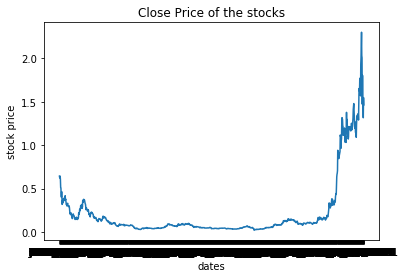

In [5]:
plt.plot(fd.Date,fd.Price)
plt.title('Close Price of the stocks')
plt.xlabel('dates')
plt.ylabel('stock price')
plt.show

In [6]:
fd_price=fd[['Date','Price']]
fd_price

,Date,Price
1216,"Jan 25, 2018",0.642000
1215,"Jan 26, 2018",0.626794
1214,"Jan 27, 2018",0.621320
1213,"Jan 28, 2018",0.642267
1212,"Jan 29, 2018",0.602000
...,...,...
4,"May 21, 2021",1.547610
3,"May 22, 2021",1.463110
2,"May 23, 2021",1.315168
1,"May 24, 2021",1.547325


In [7]:

fd_price.drop('Date',axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
fd_price.head()

,Price
1216,0.642000
1215,0.626794
1214,0.621320
1213,0.642267
1212,0.602000


In [9]:
final_data_set=fd_price.values


In [10]:
final_data_set

array([[0.642   ],
       [0.626794],
       [0.62132 ],
       ...,
       [1.315168],
       [1.547325],
       [1.463231]])

In [11]:
train_data= final_data_set[:1000,:]
validation_data = final_data_set[1000:,:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train_data)
test=scaler.transform(validation_data)

In [14]:
train.shape[0]

1000

In [15]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)
    

In [16]:
look_back=60
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [17]:
trainX.shape


(940, 60)

In [18]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape , testX.shape

((940, 60, 1), (157, 60, 1))

In [19]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

Using TensorFlow backend.
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [20]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(look_back,1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(trainX,trainY,epochs=1,batch_size=1,verbose=2)


Epoch 1/1
 - 80s - loss: 0.0012


In [21]:
testpredict=lstm_model.predict(testX)
testpredict=scaler.inverse_transform(testpredict).ravel()

trainPredict=lstm_model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testpredict.shape, testTrue.shape

((157,), (157,))

In [22]:
trainPredict.shape

(940,)

In [41]:
testpredict[156]

1.0040046

In [23]:
data_df=fd.Date
date=data_df.values
date_test=date[940:]
date_test.shape
date_train=date[:940]
date_train.shape

(940,)

In [24]:
trainTrue.shape,date_train.shape,trainPredict.shape,date_train.shape

((940,), (940,), (940,), (940,))

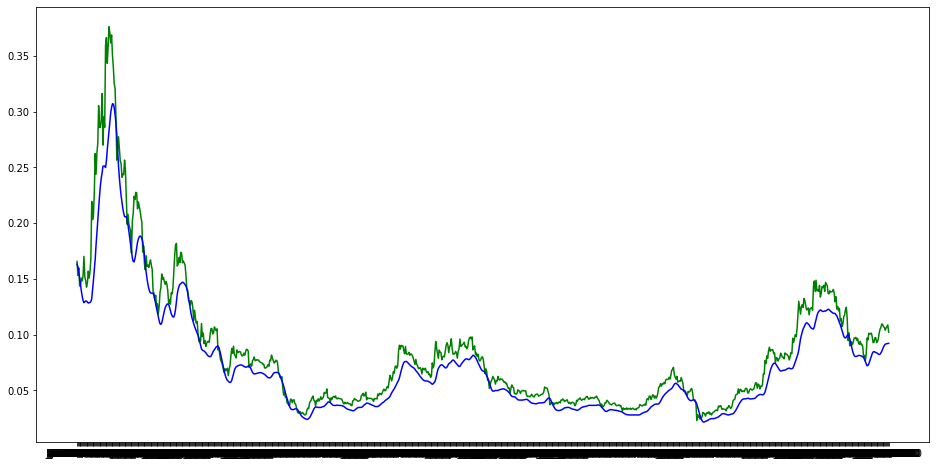

In [25]:
plt.figure(figsize=(16,8))
plt.plot(date_train,trainTrue, c = 'g')
plt.plot(date_train,trainPredict, c = 'b')
plt.show()

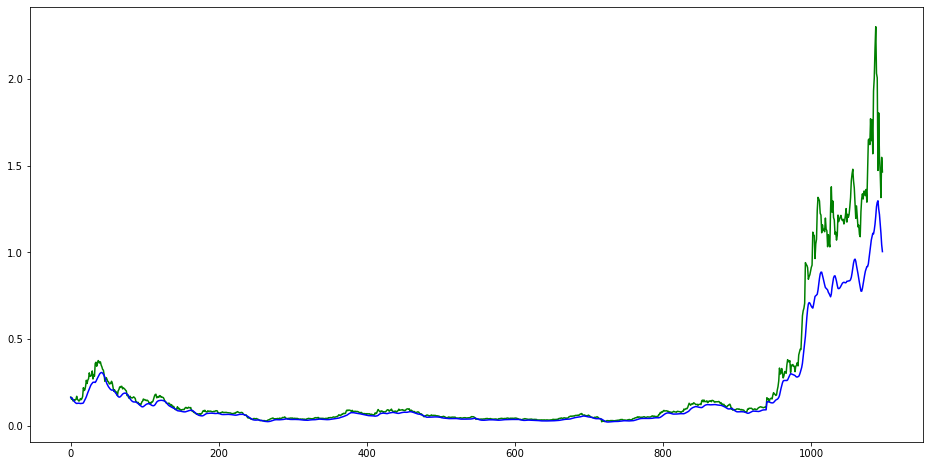

In [26]:
combinedPredicted = np.concatenate((trainPredict, testpredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.figure(figsize=(16,8))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [29]:
# front_data=fd_price[::-1]
front_data=fd_price[len(fd_price)-60:]

In [30]:
front_data

,Price
59,1.176785
58,1.189546
57,1.202812
56,1.212645
55,1.191349
54,1.182820
53,1.190254
52,1.163307
51,1.181938
50,1.211655


In [31]:
test=front_data.values

In [32]:
test.shape

(60, 1)

In [33]:
td=scaler.transform(test)

In [34]:
tdf=np.reshape(td,(1,60,1))

In [35]:
tpd=lstm_model.predict(tdf)

In [36]:
tpd=scaler.inverse_transform(tpd).ravel()

In [37]:
tpd

array([0.9709822], dtype=float32)